# PaperMage
## Quick start demo

`papermage` is a toolkit that allows **representing**, **processing**, and **manipulating** visually-rich scientific documents. 

With `papermage`, you can:
1. **Parse a PDF** into a structured representation of its elements
2. Interactively **traverse the document structure** across different levels of granularity (e.g., pages, paragraphs, sentences, etc.) and modalities (e.g., text, figures, tables, etc.)
3. **Implement custom models** (we call them `Predictors`) to further analyze documents (i.e., add more `Layers`)
4. Quickly vizualize the results of your models in a notebook (as we are about to do!)

<p align="center">
    <img src="res/fig1.png" width="500">
</p>


In [8]:
# helper function to get current working directory
from IPython import get_ipython # type: ignore
import os
pwd = os.path.abspath(get_ipython().run_line_magic("pwd", ""))  # type: ignore
os.path.abspath(get_ipython().run_line_magic("pwd", ""))  # type: ignore

'/Users/lucas/Code/papermage/examples'

## Using Recipes to get Documents

Documents are annoying to build from scratch. But we don't have to! Let's use a predefined recipe:

In [16]:
import pathlib
from papermage.recipes import CoreRecipe
fixture_path = pathlib.Path(pwd).parent / "tests/fixtures"

recipe = CoreRecipe()
doc = recipe.run(fixture_path / "papermage.pdf")

100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


let's visualize the first page of the PDF we just opened:

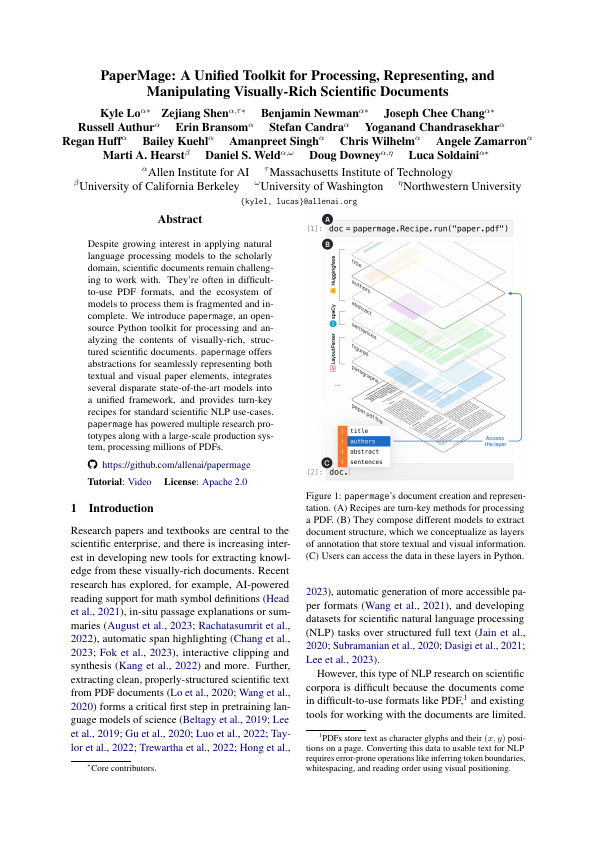

In [20]:
doc.pages[0].images[0]

It looks great! How about visualizing some of the layers in the document? 
For example, let's highlight all tokens in yellow, and put a red box around the abstract.

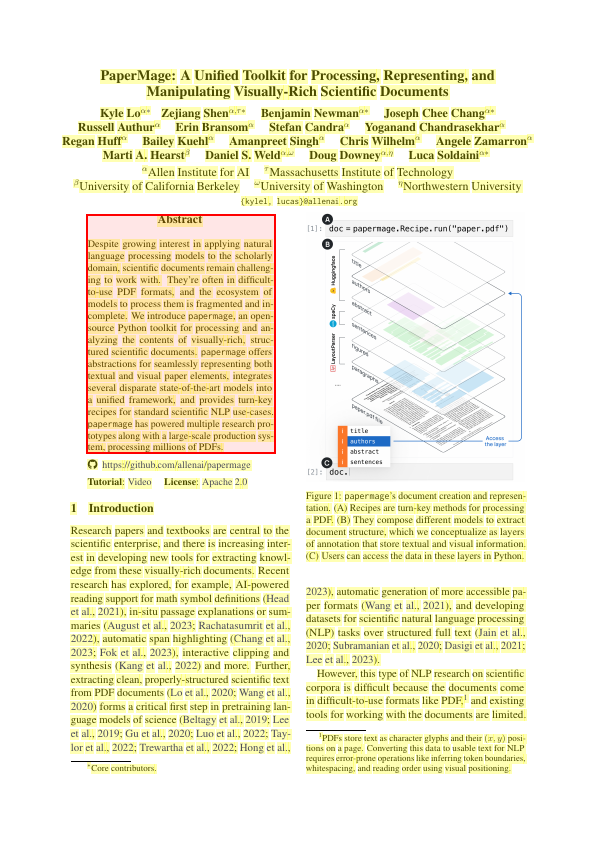

In [102]:
from papermage.visualizers import plot_entities_on_page

page = doc.pages[0]
highlighted = plot_entities_on_page(page.images[0], page.tokens, box_width=0, box_alpha=0.3, box_color="yellow")
highlighted = plot_entities_on_page(highlighted, page.abstracts, box_width=2, box_alpha=0.1, box_color="red")
display(highlighted)

Let's now look at how we can get sentences in the abstract, and then get the tokens in each sentence:

In [53]:
for sentence in doc.abstracts[0].sentences:
    words = []
    # skip the first two words, which header 
    for word in sentence.words:
        words.append(word.text)
    print(" ".join(words)[:80] + "...")

org Abstract Despite growing interest in applying natural language processing mo...
They’re often in difficult-to-use PDF formats , and the ecosystem of models to p...
We introduce papermage , an open-source Python toolkit for processing and analyz...
papermage offers abstractions for seamlessly representing both textual and visua...
papermage has powered multiple research pro-totypes along with a large-scale pro...


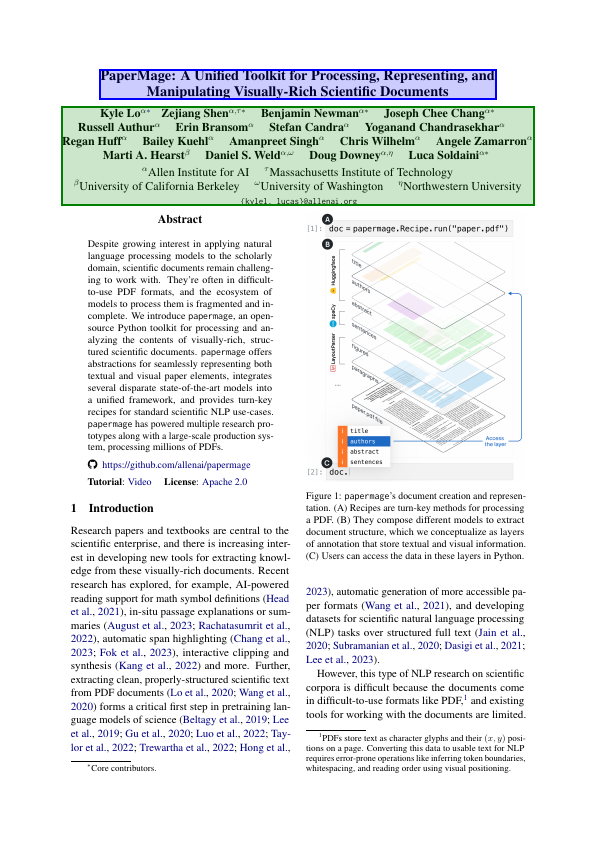

TITLE:
PaperMage: A Unified Toolkit for Processing, Representing, and
Manipulating Visually-Rich Scientific Documents


AUTHORS:
Kyle Lo α ∗
Zejiang Shen α,τ ∗
Benjamin Newman α ∗
Joseph Chee Chang α ∗
Russell Authur α
Erin Bransom α
Stefan Candra α
Yoganand Chandrasekhar α
Regan Huff α
Bailey Kuehl α
Amanpreet Singh α
Chris Wilhelm α
Angele Zamarron α
Marti A. Hearst β
Daniel S. Weld α,ω
Doug Downey α,η
Luca Soldaini α ∗
α Allen Institute for AI
τ Massachusetts Institute of Technology
β University of California Berkeley
ω University of Washington
η Northwestern University
{kylel, lucas}@allenai.org


In [103]:
highlighted = plot_entities_on_page(doc.pages[0].images[0], doc.pages[0].titles, box_color="blue", box_alpha=0.2)
highlighted = plot_entities_on_page(highlighted, doc.pages[0].authors, box_color="green", box_alpha=0.2)
display(highlighted)

print('TITLE:')
print(doc.pages[0].titles[0].text)
print('\n\nAUTHORS:')
print(doc.pages[0].authors[0].text)